Bivariate analysis - Categorical vs Categorical - Chi-sqaure test

There are two main kinds of chi square tests: 
1) The test of independence, which asks a question of relationship, such as, "Is there a relationship between gender and SAT scores?"; 
2) The goodness-of-fit test, which asks something like "If a coin is tossed 100 times, will it come up heads 50 times and tails 50 times?"

Problem Statement: Test the hypothesis whether the students smoking habit is independent of their exercise level 

HO : Smoking habit is independent of exercise level
H1 : Smoking habit is depend on exercise level

In [31]:
# Lets import the data set

from pydataset import data

survey = data('survey')

In [32]:
# Lets explore a bit more about smoking and exercise

import pandas as pd

tble = pd.crosstab(index= survey['Smoke'], columns=survey['Exer'])

#tble

In [8]:
from scipy.stats import chi2_contingency

chi2_contingency(tble)

(5.488545890584232,
 0.48284216946545633,
 6,
 array([[ 5.36016949,  1.0720339 ,  4.56779661],
        [92.09745763, 18.41949153, 78.48305085],
        [ 9.25847458,  1.85169492,  7.88983051],
        [ 8.28389831,  1.65677966,  7.05932203]]))

Interpreting the result:

1) The first value (5.488) is the chi-square statistic - test that measures how expectations compare to actual observed data (or model results). We can then look at a chi squared statistic table to see, given the degrees of freedom in our set-up, if the result is statistically significant or not.
2) The second value is the p-value - 0.4828 which is greater than my alpha in this case
3) The 3rd value is degree of freedom - This can be calculated by taking the number of rows minus one and multiplying this result by the number of columns minus one.
4) Finally, the array at the end of the output is the contingency table with expected values based on all of our samples.

Bivariate analysis - Categorical vs Categorical - Grouped bar chart and stacked bar chart

Comparing two categorical column based on a numerical value

In [10]:
# lets plot the average age for each smoker and exercise person

mean_age = survey.groupby(['Smoke', 'Exer'])['Age'].mean().reset_index()

,Smoke,Exer,Age
0,Heavy,Freq,22.773714
1,Heavy,None,20.917000
2,Heavy,Some,18.333667
3,Never,Freq,20.151379
4,Never,None,21.176000


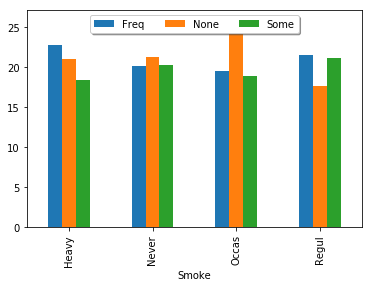

In [13]:
# Pandas will show grouped bars by columns. 
# Entries in each row but different columns will constitute a group in the resulting plot. 
# Hence you need to "reshape" your dataframe to have the "group" as columns. In this case you can pivot like

df = mean_age.pivot('Smoke', 'Exer', 'Age')

df.head()

# Plotting the grouped bar chart

from matplotlib import pyplot as plt

df.plot(kind= "bar")

# Creating a subplot to place lagends

ax = plt.subplot(111)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=4, fancybox=True, shadow=True)

plt.show()

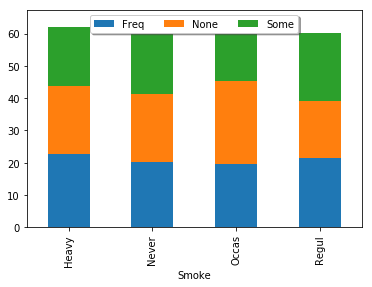

In [15]:
# Ploting a stacked bar chart

# Plotting the grouped bar chart

from matplotlib import pyplot as plt

df.plot(kind= "bar", stacked = True)

# Creating a subplot to place lagends

ax = plt.subplot(111)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=4, fancybox=True, shadow=True)

plt.show()

Bivariate analysis - Time series - Few bivariate analysis on time series data:

1) Line chart
2) Heat Maps
3) Box and Whisker Plots etc

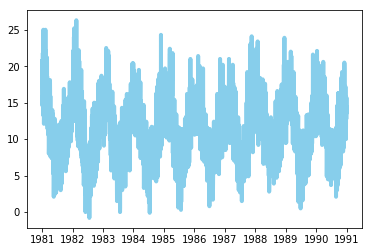

In [18]:
# Line Chart

# Importing the data set 

temp = pd.read_excel('E:\\Training data\\PGDS- EDA\\Batch 6\\daily-minimum-temperatures.xlsx')

# ploting the line chart of temperatures

from matplotlib import pyplot as plt

plt.plot('Date', 'Daily minimum temperatures', data=temp, color='skyblue', linewidth=4)

plt.show()

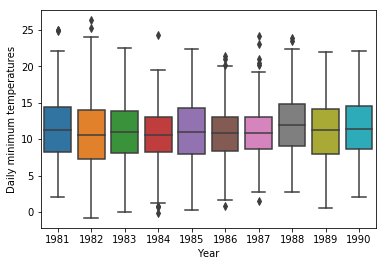

In [20]:
# Lets see the temp. variation year on year using Box plot

# Lets create a new colum of Year

from datetime import date

temp['Year'] = temp['Date'].dt.year

# Ploting the box plot for each year

import seaborn as sns

sns.boxplot(data=temp, x='Year', y='Daily minimum temperatures')

Heat map - A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. There are many different color schemes that can be used to illustrate the heatmap, with perceptual advantages and disadvantages for each.

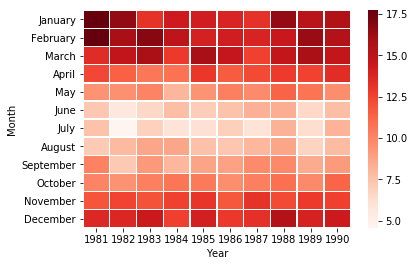

In [30]:
# I would like to see the trend in temp (Average temp) for each month of each year
# Lets create a column of month also

temp['Month'] = temp['Date'].dt.month_name()

# Lets plot the heat map to see the trend in temp for each month of each year

# Step1: Groupby the data for Each month of each year with average temp

group_temp = temp.groupby(['Year', 'Month'])['Daily minimum temperatures'].mean().reset_index()

group_temp.head()

# Step 2: Convert the data to a wide data where row contain months and column contain year

temp_wide = group_temp.pivot("Month", "Year", "Daily minimum temperatures")

temp_wide.head()

# Step 3: Order the index month

index_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']

temp_wide = temp_wide.reindex(index_order)

# Step 4: Lets create a heat map

sns.heatmap(temp_wide,linewidths=0.5,cbar=True,cmap="Reds")

plt.show()

Data Cleaning - Handling missing value

There are two types of missing data: 1) MCAR: missing completely at random. This is the desirable scenario in case of missing data. 2) MNAR: missing not at random. Missing not at random data is a more serious issue and in this case it might be wise to check the data gathering process further and try to understand why the information is missing. For instance, if most of the people in a survey did not answer a certain question, why did they do that? Was the question unclear?

In [1]:
# Lets import the data

import pandas as pd
import os
import numpy as np

path = r"E:\Training data\Amit\Data Set"

os.chdir(path)

election = pd.read_excel('Election data base.xlsx')

election.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [4]:
# We can see lot of missing values. Lets check the number rows in each column having missing value

Null_value = election.isnull().sum()

Null_value

# Lets find the percentage of missing values in each column

Percent_missing = (Null_value/len(election.index))*100

Percent_missing

st_name       0.000000
year          0.000000
ac_no         0.000000
ac_name       4.913931
ac_type       0.000000
cand_name     0.000306
cand_sex      1.619950
partyname     0.000000
partyabbre    0.826780
totvotpoll    0.002139
electors      0.000000
dtype: float64

In [5]:
# We can also use plot the data to find which column have more missing values

# Visualizing the patterns of missing value occurrence

import seaborn as sns

from matplotlib import pyplot as plt

sns.heatmap(election.isnull(), cbar=False)

Missing Value treatment - We can do following with missing values

1) We can replace them - a) by zero b) by a specific value c) by the mean or median of the specific column d) replace them by forward fill e) replace them by back fill

2) We can drop them - a) by droping all the rows containing missing values b) by droping all the columns containing missing values

3) Imputation of missing values by algorithm like kNN and MICE

In [6]:
# Replacing the missing value

# a) By zero or a specific value

election['totvot_zero_fill'] = election['totvotpoll'].fillna(0)

election.isnull().sum()


st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
dtype: int64

In [7]:
# b) By mean / median of the of totvotpoll

totvotpoll_mean = election['totvotpoll'].mean()

election['totvot_mean_fill'] = election['totvotpoll'].fillna(totvotpoll_mean)

election.isnull().sum()

st_name                 0
year                    0
ac_no                   0
ac_name             16083
ac_type                 0
cand_name               1
cand_sex             5302
partyname               0
partyabbre           2706
totvotpoll              7
electors                0
totvot_zero_fill        0
totvot_mean_fill        0
dtype: int64

In [8]:
# Lets check the impact of imputing missing value by mean

# Lets take the state of sikkim as the column have missing value under totvotpoll column

sikkim_data = election[election['st_name'] == "Sikkim"]

# lets check the missing values which are in year 2004

sikkim_data_missing = sikkim_data[sikkim_data['year'] == 2004] 

#sikkim_data_missing

In [9]:
# Lets plot the total vote year wise

totvotpoll_line = sikkim_data.groupby(['year'])['totvotpoll'].sum().reset_index()

totvotpoll_line.head()

# lets get the same for the column where we have imputed the mean values

totvotpoll_mean_fill_line = sikkim_data.groupby(['year'])['totvot_mean_fill'].sum().reset_index()

totvotpoll_mean_fill_line.head()

,year,totvot_mean_fill
0,1979.0,72339.0
1,1985.0,97057.0
2,1989.0,133619.0
3,1994.0,173457.0
4,1999.0,204927.0


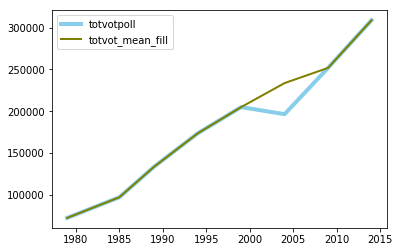

In [10]:
# lets plot these two line chart

plt.plot( 'year', 'totvotpoll', data=totvotpoll_line, color='skyblue', linewidth=4)
plt.plot( 'year', 'totvot_mean_fill', data=totvotpoll_mean_fill_line, color='olive', linewidth=2)
plt.legend()
plt.show()


In [11]:
# d) replace them by forward fill or back fill

election['Forward_fill'] = election['totvotpoll'].fillna(method = 'ffill')

election.isnull().sum()

# lets check how forward fill work

sikkim_data = election[election['st_name'] == "Sikkim"]

# lets check the missing values which are in year 2004

sikkim_data_missing = sikkim_data[sikkim_data['year'] == 2004] 

#sikkim_data_missing
